In [70]:
#import libraries 
import os 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
%matplotlib inline

In [21]:
import glob
glob.glob('*csv')

['airline-passengers.csv',
 'AirPassenger.csv',
 'AirPax.csv',
 'AirTemp.csv',
 'beer.csv',
 'beers.csv',
 'BigmartSales.csv',
 'CARSALES.CSV',
 'Car_sales.csv',
 'Champagne.csv',
 'column_2C_weka.csv',
 'daily-minimum-temperatures.csv',
 'daily-total-female-births.csv',
 'dart_wtr_hhcc_2011_2013_pro.csv',
 'data (1).csv',
 'data.csv',
 'diabetes.csv',
 'EngWage.csv',
 'fifa.csv',
 'fifa_ variable_information.csv',
 'GDPIndia.csv',
 'GDPUS.csv',
 'glass.csv',
 'headbrain.csv',
 'house power.csv',
 'house_power.csv',
 'HousingData.csv',
 'Iris.csv',
 'MaunaLoa.csv',
 'oildata.csv',
 'parkinson.csv',
 'Petrol.csv',
 'prima-indians-diabetes.csv',
 'raw.csv',
 'Regression - CEO base pay-1.csv',
 'Regression - CEO base pay.csv',
 'RetailFood.csv',
 'RetailTurnover.csv',
 'retail_data.csv',
 'Sales_Data.csv',
 'Sales_Qty.csv',
 'shampoo-sales.csv',
 'Shoe Sales.csv',
 'stimulation crashes.csv',
 'Stock Market data .csv',
 'suv.csv',
 'TataGlobal-NSE.csv',
 'tennisplay.csv',
 'titanic.csv',
 

In [36]:
#import data set
c= pd.read_csv('CARSALES.CSV')
c.head()

,Sales_in_thousands,Resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,NaN
3,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639


In [27]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
Sales_in_thousands    157 non-null float64
Resale_value          121 non-null float64
Vehicle_type          157 non-null object
Price_in_thousands    155 non-null float64
Engine_size           156 non-null float64
Horsepower            156 non-null float64
Wheelbase             156 non-null float64
Width                 156 non-null float64
Length                156 non-null float64
Curb_weight           155 non-null float64
Fuel_capacity         156 non-null float64
Fuel_efficiency       154 non-null float64
Power_perf_factor     155 non-null float64
dtypes: float64(12), object(1)
memory usage: 16.0+ KB


In [28]:
c.shape

(157, 13)

In [29]:
#summary statistics
c.describe()

,Sales_in_thousands,Resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [30]:
c.columns

Index(['Sales_in_thousands', 'Resale_value', 'Vehicle_type',
       'Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width',
       'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency',
       'Power_perf_factor'],
      dtype='object')

In [31]:
#drop the duplicate row if any
c=c.drop_duplicates(keep='first')
#this data set doesnt have any duplicates.

In [46]:
#dropping rows which have null values
c.dropna(inplace=True)

In [47]:
c.head()

,Sales_in_thousands,Resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Passenger,Car
0,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,True,False
1,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,True,False
3,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,True,False
4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,True,False
5,18.780,23.555,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105,True,False


In [80]:
c

,Sales_in_thousands,Resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Passenger,Car
0,16.919,16.360,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,True,False
1,39.384,19.875,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,True,False
3,8.588,29.725,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,True,False
4,20.397,22.255,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,True,False
5,18.780,23.555,33.950,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105,True,False
6,1.380,39.000,62.000,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,134.656858,True,False
8,9.231,28.675,33.400,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,81.877069,True,False
9,17.527,36.125,38.900,2.8,193.0,111.4,70.9,188.0,3.472,18.5,25.0,83.998724,True,False
10,91.561,12.475,21.975,3.1,175.0,109.0,72.7,194.6,3.368,17.5,25.0,71.181451,True,False
11,39.350,13.740,25.300,3.8,240.0,109.0,72.7,196.2,3.543,17.5,23.0,95.636703,True,False


In [48]:
#replace space in column name
c.columns= c.columns.str.replace('','')

In [50]:
c.corr()

,Sales_in_thousands,Resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Passenger,Car
Sales_in_thousands,1.000000,-0.275426,-0.251705,0.038111,-0.152538,0.406839,0.177802,0.272336,0.067184,0.138045,-0.066927,-0.175562,-0.278774,0.278774
Resale_value,-0.275426,1.000000,0.954757,0.527187,0.773110,-0.053685,0.178128,0.025390,0.363274,0.324796,-0.398459,0.829511,0.091679,-0.091679
Price_in_thousands,-0.251705,0.954757,1.000000,0.649170,0.853455,0.067042,0.301292,0.182592,0.511400,0.406496,-0.479539,0.905002,0.076303,-0.076303
Engine_size,0.038111,0.527187,0.649170,1.000000,0.861618,0.410020,0.671756,0.537343,0.742831,0.616862,-0.724871,0.841005,-0.182515,0.182515
Horsepower,-0.152538,0.773110,0.853455,0.861618,1.000000,0.225905,0.507275,0.400968,0.598603,0.479790,-0.595844,0.994071,0.045867,-0.045867
Wheelbase,0.406839,-0.053685,0.067042,0.410020,0.225905,1.000000,0.675559,0.853669,0.675609,0.658654,-0.470455,0.200228,-0.385062,0.385062
Width,0.177802,0.178128,0.301292,0.671756,0.507275,0.675559,1.000000,0.743226,0.735957,0.672191,-0.599604,0.478889,-0.220744,0.220744
Length,0.272336,0.025390,0.182592,0.537343,0.400968,0.853669,0.743226,1.000000,0.684305,0.562504,-0.465682,0.366831,-0.109779,0.109779
Curb_weight,0.067184,0.363274,0.511400,0.742831,0.598603,0.675609,0.735957,0.684305,1.000000,0.847994,-0.818819,0.597586,-0.469247,0.469247
Fuel_capacity,0.138045,0.324796,0.406496,0.616862,0.479790,0.658654,0.672191,0.562504,0.847994,1.000000,-0.808506,0.478484,-0.586927,0.586927


# model linearRegression 

In [51]:
X_train, X_test, y_train, y_test = train_test_split(c.drop('Sales_in_thousands', axis=1), c['Sales_in_thousands'], random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'.format(linreg.coef_))
print('linear model intercept (b): {:.3f}'.format(linreg.intercept_))
print('R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))

linear model coeff (w): [-1.06903257e+00 -2.07513067e+06 -1.40156133e+06 -1.90267119e+06
  6.20516253e+00  1.07111863e+00  1.07893225e-01 -7.74266178e+01
 -5.74530994e+00 -1.09341774e+00  5.37939793e+06 -3.02163490e+01
  3.02050099e+01]
linear model intercept (b): -343.339
R-squared score (training): 0.386
R-squared score (test): 0.112


# KNN regression

In [52]:
knn = KNeighborsRegressor().fit(X_train, y_train)
print('R-squared score (training): {:.3f}'.format(knn.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(knn.score(X_test, y_test)))

R-squared score (training): 0.404
R-squared score (test): -0.284


In [53]:
grid_values = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
grid_knn_mse = GridSearchCV(knn, param_grid = grid_values, scoring = 'neg_mean_squared_error', cv=5, iid=False)
grid_knn_mse.fit(X_train, y_train)

print('Grid best parameter (min. MSE): ', grid_knn_mse.best_params_)
print('Grid best score (MSE): ', grid_knn_mse.best_score_)

Grid best parameter (min. MSE):  {'n_neighbors': 8}
Grid best score (MSE):  -5485.406300883937


In [54]:
knn = grid_knn_mse.best_estimator_
print('R-squared score (training): {:.3f}'.format(knn.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(knn.score(X_test, y_test)))

R-squared score (training): 0.255
R-squared score (test): -0.202


# support vector machine

In [55]:
svm = SVR(gamma='scale').fit(X_train, y_train)
print('R-squared score (training): {:.3f}'.format(svm.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(svm.score(X_test, y_test)))

R-squared score (training): -0.125
R-squared score (test): -0.159


In [56]:
grid_values = {'gamma': [0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10],\
               'C': [0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]}
grid_svm_mse = GridSearchCV(svm, param_grid = grid_values, scoring = 'neg_mean_squared_error', cv=5, iid=False)
grid_svm_mse.fit(X_train, y_train)

print('Grid best parameter (min. MSE): ', grid_svm_mse.best_params_)
print('Grid best score (MSE): ', grid_svm_mse.best_score_)

Grid best parameter (min. MSE):  {'C': 10, 'gamma': 0.0003}
Grid best score (MSE):  -6585.22125730634


In [57]:
svm = grid_svm_mse.best_estimator_
print('R-squared score (training): {:.3f}'.format(svm.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(svm.score(X_test, y_test)))

R-squared score (training): -0.038
R-squared score (test): -0.100


# Decision Tree Regression

In [58]:
dt = DecisionTreeRegressor().fit(X_train, y_train)
print('R-squared score (training): {:.3f}'.format(dt.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(dt.score(X_test, y_test)))

R-squared score (training): 1.000
R-squared score (test): -1.088


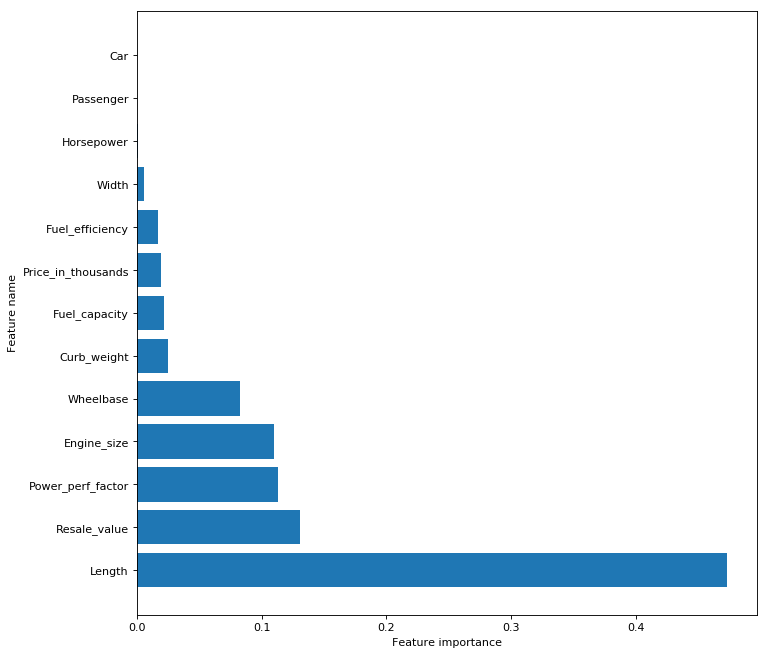

In [59]:
plt.figure(figsize=(10,10), dpi=80)
feature_names = X_train.columns
feature_importance = pd.DataFrame(feature_names, columns=['features'])
feature_importance['importance'] = pd.DataFrame(dt.feature_importances_)
feature_importance.sort_values(by='importance', ascending=False, inplace=True)
feature_importance.reset_index(drop=True, inplace=True)
plt.barh(feature_importance['features'], feature_importance['importance'])
plt.xlabel('Feature importance')
plt.ylabel('Feature name')
plt.show()

In [60]:
grid_values = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],\
               'min_samples_split': [2, 4, 8, 16, 32, 64, 100],\
               'min_samples_leaf': [1, 2, 4, 8, 16, 32, 64, 100]}
grid_dt_mse = GridSearchCV(dt, param_grid = grid_values, scoring = 'neg_mean_squared_error', cv=5, iid=False)
grid_dt_mse.fit(X_train, y_train)

print('Grid best parameter (min. MSE): ', grid_dt_mse.best_params_)
print('Grid best score (MSE): ', grid_dt_mse.best_score_)

Grid best parameter (min. MSE):  {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 4}
Grid best score (MSE):  -5811.575904212583


In [61]:
dt = grid_dt_mse.best_estimator_
print('R-squared score (training): {:.3f}'.format(dt.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(dt.score(X_test, y_test)))


R-squared score (training): 0.617
R-squared score (test): 0.057


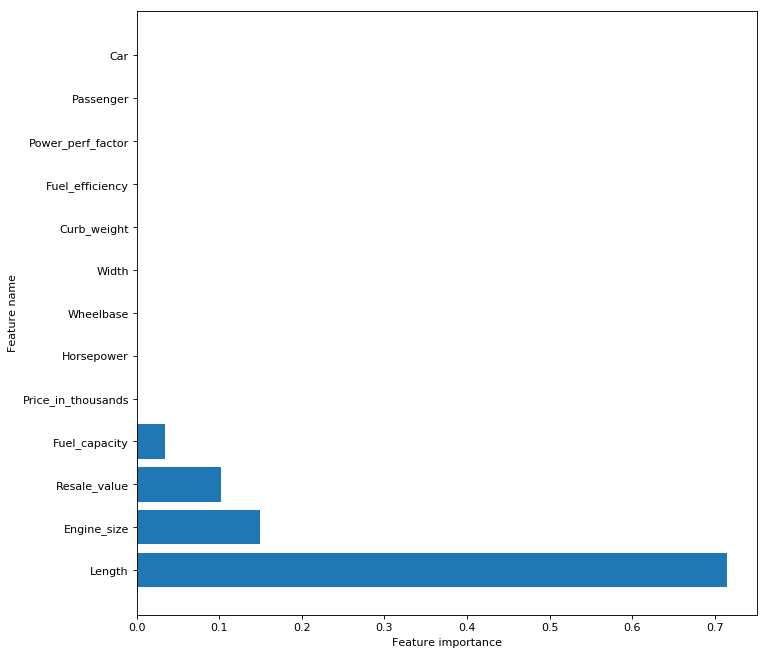

In [67]:
plt.figure(figsize=(10,10), dpi=80)
feature_names = X_train.columns
feature_importance = pd.DataFrame(feature_names, columns=['features'])
feature_importance['importance'] = pd.DataFrame(dt.feature_importances_)
feature_importance.sort_values(by='importance', ascending=False, inplace=True)
feature_importance.reset_index(drop=True, inplace=True)
plt.barh(feature_importance['features'], feature_importance['importance'])
plt.xlabel('Feature importance')
plt.ylabel('Feature name')
plt.show()

# random forest

In [63]:
rf = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)
print('R-squared score (training): {:.3f}'.format(rf.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(rf.score(X_test, y_test)))

R-squared score (training): 0.867
R-squared score (test): -0.079


In [64]:
grid_values = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],\
               'min_samples_split': [2, 4, 8, 16, 32, 64, 100],\
               'min_samples_leaf': [1, 2, 4, 8, 16, 32, 64, 100]}
grid_rf_mse = GridSearchCV(rf, param_grid = grid_values, scoring = 'neg_mean_squared_error', cv=5, iid=False)
grid_rf_mse.fit(X_train, y_train)

print('Grid best parameter (min. MSE): ', grid_rf_mse.best_params_)
print('Grid best score (MSE): ', grid_rf_mse.best_score_)

Grid best parameter (min. MSE):  {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 4}
Grid best score (MSE):  -5140.492261161079


In [65]:
rf = grid_rf_mse.best_estimator_
print('R-squared score (training): {:.3f}'.format(rf.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(rf.score(X_test, y_test)))

R-squared score (training): 0.683
R-squared score (test): -0.063


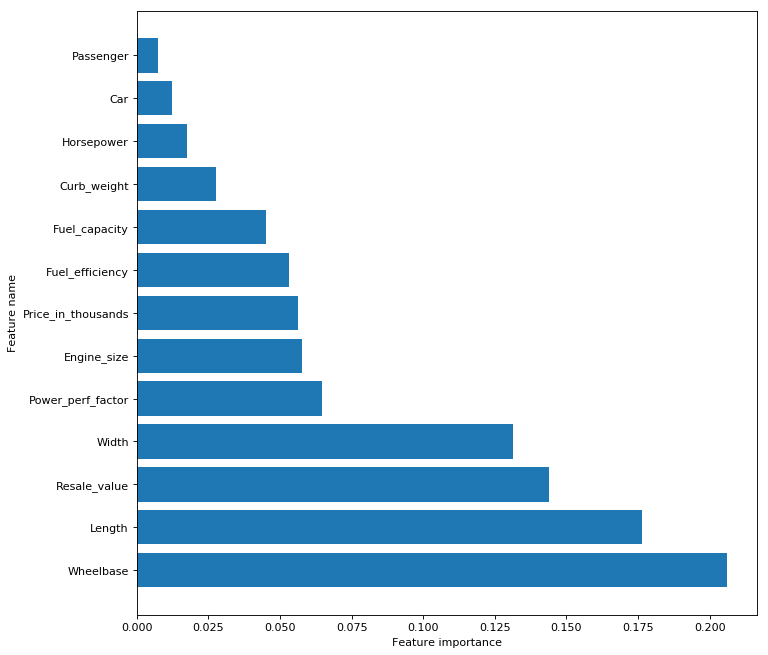

In [66]:
plt.figure(figsize=(10,10), dpi=80)
feature_names = X_train.columns
feature_importance = pd.DataFrame(feature_names, columns=['features'])
feature_importance['importance'] = pd.DataFrame(rf.feature_importances_)
feature_importance.sort_values(by='importance', ascending=False, inplace=True)
feature_importance.reset_index(drop=True, inplace=True)
plt.barh(feature_importance['features'], feature_importance['importance'])
plt.xlabel('Feature importance')
plt.ylabel('Feature name')
plt.show()

# sklearn Gradient boosting regression 

In [71]:
gb = GradientBoostingRegressor().fit(X_train, y_train)
print('R-squared score (training): {:.3f}'.format(gb.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(gb.score(X_test, y_test)))

R-squared score (training): 0.991
R-squared score (test): -0.142


In [72]:
grid_values = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],\
               'min_samples_split': [2, 4, 8, 16, 32, 64, 100],\
               'min_samples_leaf': [1, 2, 4, 8, 16, 32, 64, 100]}
grid_gb_mse = GridSearchCV(gb, param_grid = grid_values, scoring = 'neg_mean_squared_error', cv=5, iid=False)
grid_gb_mse.fit(X_train, y_train)

print('Grid best parameter (min. MSE): ', grid_gb_mse.best_params_)
print('Grid best score (MSE): ', grid_gb_mse.best_score_)

Grid best parameter (min. MSE):  {'max_depth': 6, 'min_samples_leaf': 16, 'min_samples_split': 64}
Grid best score (MSE):  -5293.600609502142


In [73]:
gb = grid_gb_mse.best_estimator_
print('R-squared score (training): {:.3f}'.format(gb.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(gb.score(X_test, y_test)))

R-squared score (training): 0.590
R-squared score (test): -0.152


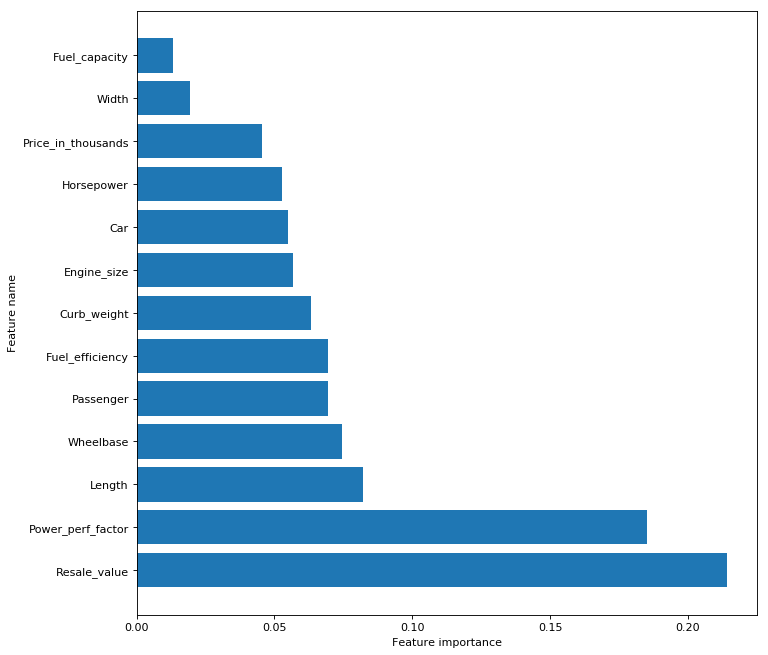

In [74]:
plt.figure(figsize=(10,10), dpi=80)
feature_names = X_train.columns
feature_importance = pd.DataFrame(feature_names, columns=['features'])
feature_importance['importance'] = pd.DataFrame(gb.feature_importances_)
feature_importance.sort_values(by='importance', ascending=False, inplace=True)
feature_importance.reset_index(drop=True, inplace=True)
plt.barh(feature_importance['features'], feature_importance['importance'])
plt.xlabel('Feature importance')
plt.ylabel('Feature name')
plt.show()

# stacking (exp)

In [75]:
stacking = pd.DataFrame(y_train)
models = [linreg, knn, svm, dt, rf, gb]
for i in models:
    stacking[str(i)] = i.predict(X_train)
stacking.columns = ['Sales_in_thousands', 'LinReg', 'kNN', 'SVM', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
stacking.sort_values('Sales_in_thousands', inplace=True)
linreg_s = LinearRegression().fit(stacking.drop('Sales_in_thousands', axis=1), stacking['Sales_in_thousands'])
coef = linreg_s.coef_
print(coef)

[-0.35119307  0.16868092 -0.904201    0.36510302  0.87655028  0.62456343]


# Prediction Results

In [83]:
prediction = c.iloc [:,:1]
models = [linreg, knn, svm, dt, rf, gb]
for i in models:
    prediction[str(i)] = i.predict(c.drop('Sales_in_thousands', axis=1))
prediction.columns = ['Sales_in_thousands', 'LinReg', 'kNN', 'SVM', 'Decision Tree',  'Random Forest', 'Gradient Boosting']
prediction['Stacking'] = coef[0]*prediction['LinReg'] + coef[1]*prediction['kNN'] + coef[2]*prediction['SVM']\
                       + coef[3]*prediction['Decision Tree'] +coef[4]*prediction['Random Forest'] + coef[5]*prediction['Gradient Boosting']
                       
prediction.sort_values('Sales_in_thousands', inplace=True)
prediction.head()

,Sales_in_thousands,LinReg,kNN,SVM,Decision Tree,Random Forest,Gradient Boosting,Stacking
83,0.110,-8.278374,34.339375,25.645394,17.719739,22.404528,-7.711615,6.802947
39,0.916,44.096668,13.400375,16.124831,17.719739,17.858539,30.035475,13.076352
108,1.112,81.624382,93.049000,35.748672,57.723930,44.143935,47.630733,44.223663
125,1.280,-35.681368,15.122125,2.459019,17.719739,6.135907,-9.569074,18.729883
6,1.380,22.615420,15.122125,10.389834,17.719739,14.121828,49.228086,34.808022
